# Generating the random images

In [1]:
%pylab inline
import image_gen
import scipy.misc

Populating the interactive namespace from numpy and matplotlib


/home/jericho/ML_medphys/tf_unet/image_generator/image_gen.py:101: RuntimeWarning: invalid value encountered in log
  np.random.normal(0, np.sqrt(np.exp(nr[:, j]) * 2500)) / 2500))
/home/jericho/ML_medphys/tf_unet/image_generator/image_gen.py:127: RuntimeWarning: invalid value encountered in log
  0, np.sqrt(np.exp(nr2[:, i]) * 2500), size=image.shape)[m] / 2500))


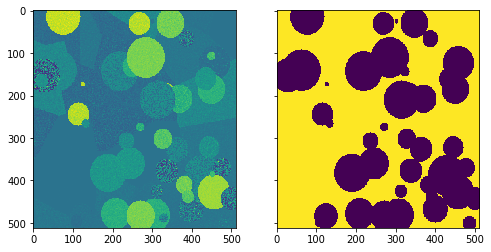

In [2]:
thickness = 22
radius = 5
nx = 512
ny = 512

generator = image_gen.get_image_gen(nx, ny, cnt=100)
x_test, y_test = generator(1)

fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,0], aspect="auto")

## Generating the training images, takes a million years

In [ ]:
nx = 512
ny = 512

generator = image_gen.get_image_gen(nx, ny, cnt=100)
x_test, y_test = generator(30)

for ii in range(30):
    scipy.misc.toimage(
        x_test[ii, ..., 0], cmin=0.0, cmax=1.0).save(
            '../unet/data/chicken/train/image/{}.png'.
            format(radius, t, ii))
    scipy.misc.toimage(
        y_test[ii, ..., 0], cmin=0.0, cmax=1.0).save(
            '../unet/data/chicken/train/label/{}.png'.
            format(radius, t, ii))

## Generating the validation data

In [ ]:
nx = 512
ny = 512

thickness_mm = [39, 34, 29, 24, 19, 14, 9, 4]

for radius in [5, 10, 15]:
    for jj, thickness in enumerate([0, 4, 6, 9, 12, 16, 19, 22]):

        generator = image_gen.get_image_gen_val(
            nx, ny, cnt=100, r=radius, rr=thickness)
        x_test, y_test = generator(2)
        t = thickness_mm[jj]
        
        print('Generated {} & {}'.format(thickness,radius))
        
        for ii in range(2):
            scipy.misc.toimage(
                x_test[ii, ..., 0], cmin=0.0, cmax=1.0).save(
                    '../unet/data/chicken/test_{}/{}/image/{}.png'.
                    format(radius, t, ii))
            scipy.misc.toimage(
                y_test[ii, ..., 0], cmin=0.0, cmax=1.0).save(
                    '../unet/data/chicken/test_{}/{}/label/{}.png'.
                    format(radius, t, ii))